# EDA by Meet

<h2 align='middle'>OpenVaccine: COVID-19 mRNA Vaccine Degradation Prediction</h2>
<h3 align='middle'>Urgent need to bring the COVID-19 vaccine to mass production</h3>
<div align='middle'> 
    <img src='https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif' alt='COIVD-19 (GIPHY)'></img>
</div>

### What is RNA?

**Ribonucleic acid**, or RNA is one of the three major biological macromolecules that are essential for all known forms of life (along with DNA and proteins). A central tenet of molecular biology states that the flow of genetic information in a cell is from DNA through RNA to proteins: **“DNA makes RNA makes protein”**.

---

### What is mRNA?

**Messenger RNAs**, also known as mRNA, are one of the types of RNA that are found in the cell. This particular one, like most RNAs, are made in the nucleus and then exported to the cytoplasm where the translation machinery, the machinery that actually makes proteins, binds to these mRNA molecules and reads the code on the mRNA to make a specific protein. So in general, one gene, the DNA for one gene, can be transcribed into an mRNA molecule that will end up making one specific protein.

---

### Why are we here?

mRNA vaccines have taken the lead as the fastest vaccine candidates for COVID-19, but currently, they face key potential limitations. One of the biggest challenges right now is how to design super stable messenger RNA molecules (mRNA). Conventional vaccines (like your seasonal flu shots) are packaged in disposable syringes and shipped under refrigeration around the world, but that is not currently possible for mRNA vaccines.

Researchers have observed that RNA molecules have a tendency to spontaneously degrade. This is a serious limitation--a single cut can render the mRNA vaccine useless. Currently, little is known on the details of where in the backbone of a given RNA is most prone to being affected. Without this knowledge, current mRNA vaccines against COVID-19 must be prepared and shipped under intense refrigeration, and are unlikely to reach more than a tiny fraction of human beings on the planet unless they can be stabilized.

---

### Our Goal: Predict the degradation rates at various locations along RNA sequence

---

### What do we have?

We have a subset of an **Eterna dataset** comprising over **3000 RNA molecules** (which span a panoply of sequences and structures) and their **degradation rates** at each position.

There are multiple ground truth values provided in the training data. While the submission format requires all 5 to be predicted, only the following are scored: reactivity, deg_Mg_pH10, and deg_Mg_50C.

#### Files
* train.json - the training data
* test.json - the test set, without any columns associated with the ground truth.
* sample_submission.csv - a sample submission file in the correct format

#### Columns

* id - An arbitrary identifier for each sample.

* seq_scored - (68 in Train and Public Test, 91 in Private Test) Integer value denoting the number of positions used in scoring with predicted values. This should match the length of reactivity, deg_* and *_error_* columns. Note that molecules used for the Private Test will be longer than those in the Train and Public Test data, so the size of this vector will be different.

* seq_length - (107 in Train and Public Test, 130 in Private Test) Integer values, denotes the length of sequence. Note that molecules used for the Private Test will be longer than those in the Train and Public Test data, so the size of this vector will be different.

* sequence - (1x107 string in Train and Public Test, 130 in Private Test) Describes the RNA sequence, a combination of A, G, U, and C for each sample. Should be 107 characters long, and the first 68 bases should correspond to the 68 positions specified in seq_scored (note: indexed starting at 0).

* structure - (1x107 string in Train and Public Test, 130 in Private Test) An array of (, ), and . characters that describe whether a base is estimated to be paired or unpaired. Paired bases are denoted by opening and closing parentheses e.g. (....) means that base 0 is paired to base 5, and bases 1-4 are unpaired.

* reactivity - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are * reactivity values for the first 68 bases as denoted in sequence, and used to determine the likely secondary structure of the RNA sample.

* deg_pH10 - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high pH (pH 10).

* deg_Mg_pH10 - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium in high pH (pH 10).

* deg_50C - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high temperature (50 degrees Celsius).

* deg_Mg_50C - (1x68 vector in Train and Public Test, 1x91 in Private Test) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium at high temperature (50 degrees Celsius).

* *_error_* - An array of floating point numbers, should have the same length as the corresponding reactivity or deg_* columns, calculated errors in experimental values obtained in reactivity and deg_* columns.

* predicted_loop_type - (1x107 string) Describes the structural context (also referred to as 'loop type')of each character in sequence. Loop types assigned by bpRNA from Vienna RNAfold 2 structure. From the bpRNA_documentation: S: paired "Stem" M: Multiloop I: Internal loop B: Bulge H: Hairpin loop E: dangling End X: eXternal loop

___

[*Competition Page*](https://www.kaggle.com/c/stanford-covid-vaccine/overview)

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

SEED = 2020

def seed_everything(SEED):
    np.random.seed(SEED)
#     tf.random.set_seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)

seed_everything(SEED)

## 2. Load Data

In [2]:
PATH = '/kaggle/input/stanford-covid-vaccine'
os.listdir(PATH)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/stanford-covid-vaccine'

In [3]:
train = pd.read_json(os.path.join(PATH,'train.json'),lines=True).drop('index',axis=1)
test = pd.read_json(os.path.join(PATH,'test.json'),lines=True).drop('index',axis=1)
sub = pd.read_csv(os.path.join(PATH,'sample_submission.csv'))

## 3. Exploratory Data-Analysis

In [4]:
print("Train data shape: ",train.shape)
print("Test data shape: ",test.shape)
print("Sample submission shape: ",sub.shape)

Train data shape:  (2400, 18)
Test data shape:  (3634, 6)
Sample submission shape:  (457953, 6)


**Why we have different size than test data for sample submission file?**  
* Test data has **629** samples for **Public Test data** & new **3005** samples for **Private Test data**. (Total 629+3005 = 3634)
* Public test data has **Sequence length of 107**. Hence, for public test data there will be total **(629*107) = 67,303 rows**
* Private test data has **Sequence length of 130**. Hence, for private test data there will be total **(3005*130) = 3,90,650 rows**

* Hence, Total rows in submission = 67,303 + 3,90,650 = **4,57,953**

In [5]:
train.head()

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [6]:
test.head()

,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


#### How the test data was produced?

Public test has **629** samples. This **629** samples were choosen from base data of **3029** in a way that it satisfies below 3 conditions:
1. Minimum value across all 5 conditions must be greater than -0.5.
2. Mean signal/noise across all 5 conditions must be greater than 1.0. [Signal/noise is defined as mean( measurement value over 68 nts )/mean( statistical error in measurement value over 68 nts)]
3. To help ensure sequence diversity, the resulting sequences were clustered into clusters with less than 50% sequence similarity, and the 629 test set sequences were chosen from clusters with 3 or fewer members. That is, any sequence in the test set should be sequence similar to at most 2 other sequences.

---
It was filtered based on three criteria detailed above to ensure that this subset is not dominated by any large cluster of RNA molecules with poor data, which might bias the public leaderboard. The remaining **2400 sequences** for which we have data are in **train.json**.

Note that these filters have not been applied to the 2400 RNAs in the public training data train.json — some of those measurements have negative values or poor signal-to-noise, or some RNA sequences have near-identical sequences in that set. But we are providing all those data in case competitors can squeeze out more signal.

The three filters noted above will also **not be applied to Private Test on 3005 sequences.**

In [7]:
train.columns

Index(['id', 'sequence', 'structure', 'predicted_loop_type', 'signal_to_noise',
       'SN_filter', 'seq_length', 'seq_scored', 'reactivity_error',
       'deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C',
       'deg_error_50C', 'reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C',
       'deg_50C'],
      dtype='object')

**What are these signal_to_noise & SN_filter columns?**
* **signal_to_noise** is defined as **mean( measurement value over 68 nts )/mean( statistical error in measurement value over 68 nts)**
  

* **SN_filter** is **1** is it satisfy the below given conditions or else it is **0**
    
    1. Minimum value across all 5 conditions must be greater than -0.5.
    2. Mean signal/noise across all 5 conditions must be greater than 1.0.
    
Here, 5 conditions are the **ground-truth** values.

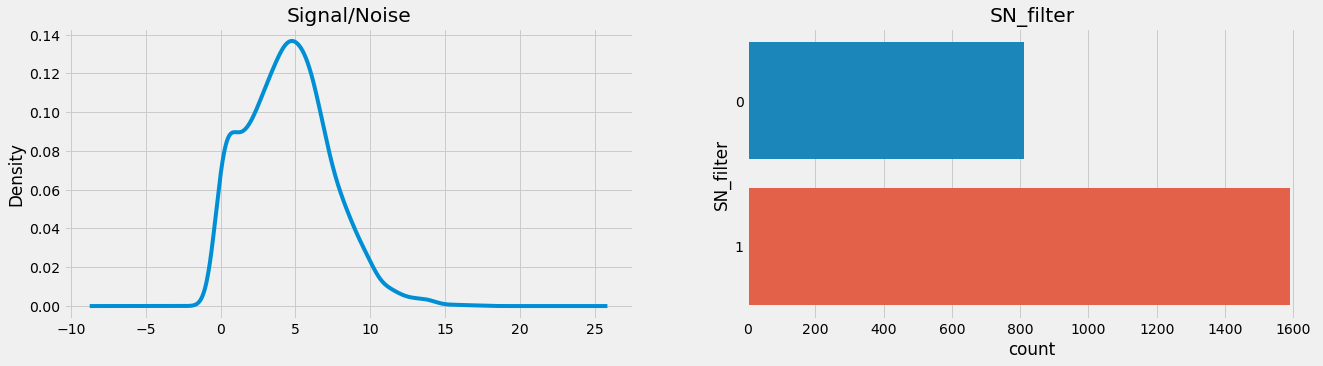

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

train['signal_to_noise'].plot.kde(ax=ax[0])
ax[0].set_title('Signal/Noise')

sns.countplot(data=train,y='SN_filter',ax=ax[1])
ax[1].set_title('SN_filter')

plt.show()

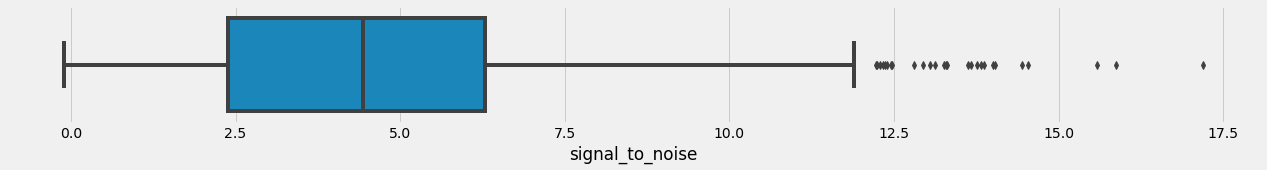

In [9]:
plt.figure(figsize=(20,2))
sns.boxplot(data=train,x='signal_to_noise')

plt.show()

* We also have **negative** values of signal/noise
* We can also see samples with **very high** signal/noise values *(could be Potential Outliers)*

In [10]:
print("Number of samples with -ev signal/noise values: ",train[train['signal_to_noise']<0].shape[0])

Q1 = np.percentile(train['signal_to_noise'],q=25)
Q3 = np.percentile(train['signal_to_noise'],q=75)
IQR = Q3 - Q1
print("Number of samples with too high signal/noise values", train[train['signal_to_noise']>Q3+1.5*IQR].shape[0])

Number of samples with -ev signal/noise values:  8
Number of samples with too high signal/noise values 27


In [11]:
train.seq_length.value_counts()

107    2400
Name: seq_length, dtype: int64

* All the samples in the train data are of **107** sequence length

In [12]:
test.seq_length.value_counts()

130    3005
107     629
Name: seq_length, dtype: int64

* Test data has both **107** & **130** sequence length samples

### Targets Averaged over Positions

In [13]:
avg_reactivity = np.array(list(map(np.array,train.reactivity))).mean(axis=0)
avg_deg_50C = np.array(list(map(np.array,train.deg_50C))).mean(axis=0)
avg_deg_pH10 = np.array(list(map(np.array,train.deg_pH10))).mean(axis=0)

avg_deg_Mg_50C = np.array(list(map(np.array,train.deg_Mg_50C))).mean(axis=0)
avg_deg_Mg_pH10 = np.array(list(map(np.array,train.deg_Mg_pH10))).mean(axis=0)

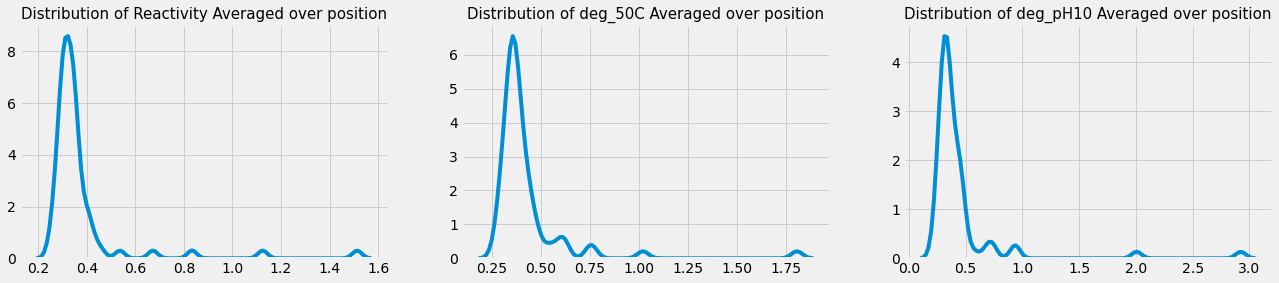

In [14]:
fig, ax = plt.subplots(1,3,figsize=(20,4))

# Distribution of Reactivity Averaged over position
sns.kdeplot(avg_reactivity,ax=ax[0])
ax[0].set_title('Distribution of Reactivity Averaged over position',size=15)

# Distribution of deg_50C Averaged over position
sns.kdeplot(avg_deg_50C,ax=ax[1])
ax[1].set_title('Distribution of deg_50C Averaged over position',size=15)

# Distribution of deg_pH10 Averaged over position
sns.kdeplot(avg_deg_pH10,ax=ax[2])
ax[2].set_title('Distribution of deg_pH10 Averaged over position',size=15)


plt.show()

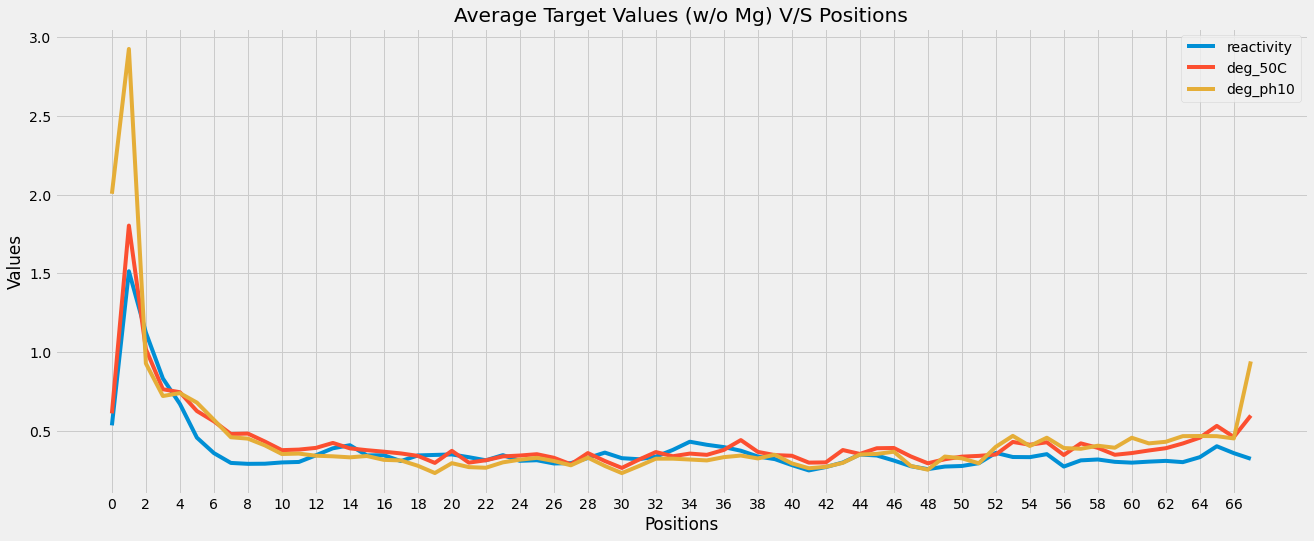

In [15]:
plt.figure(figsize=(20,8))

sns.lineplot(x=range(68),y=avg_reactivity,label='reactivity')
sns.lineplot(x=range(68),y=avg_deg_50C,label='deg_50C')
sns.lineplot(x=range(68),y=avg_deg_pH10,label='deg_ph10')

plt.xlabel('Positions')
plt.xticks(range(0,68,2))
plt.ylabel('Values')
plt.title('Average Target Values (w/o Mg) V/S Positions')

plt.show()

* We can see high values of **Degradation & Reactivity** at the beginning of the sequence
* There is high degradation because of **pH10** at the beginning but no such pattern for rest of the positions.
* We can see some correlation between **deg_50C & deg_pH10**

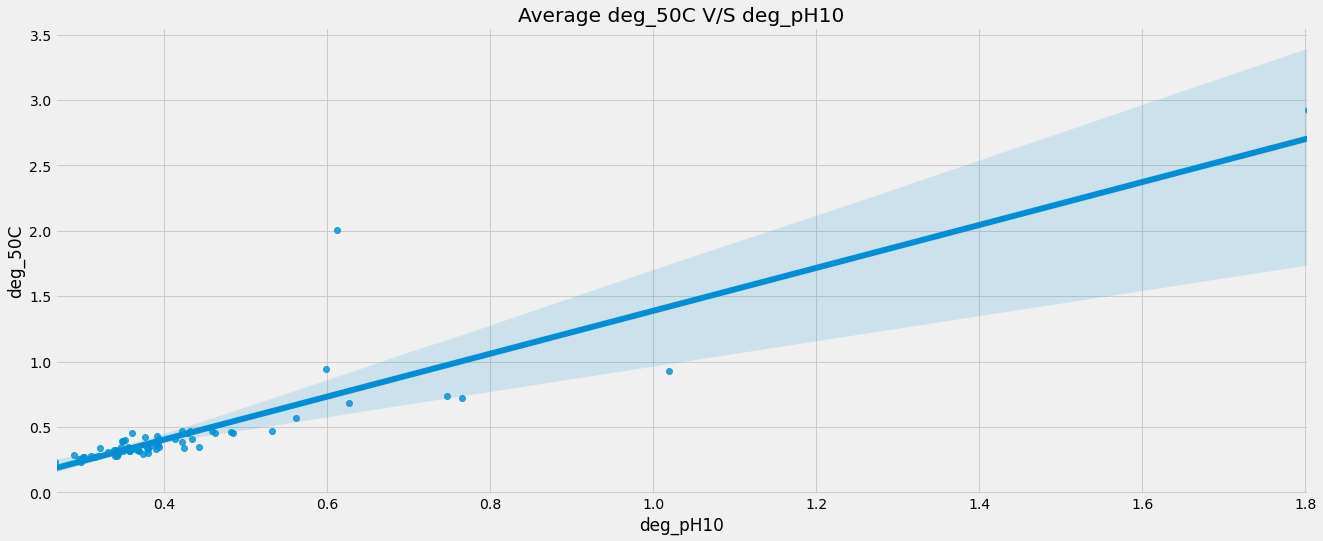

In [16]:
plt.figure(figsize=(20,8))
sns.regplot(x=avg_deg_50C,y=avg_deg_pH10)

plt.title('Average deg_50C V/S deg_pH10')
plt.ylabel('deg_50C')
plt.xlabel('deg_pH10')

plt.show()

In [17]:
print("Correlation Coeff between avg_deg_50C & avg_deg_pH10: ",np.corrcoef(avg_deg_50C,avg_deg_pH10)[0][1])

Correlation Coeff between avg_deg_50C & avg_deg_pH10:  0.8841301466799286


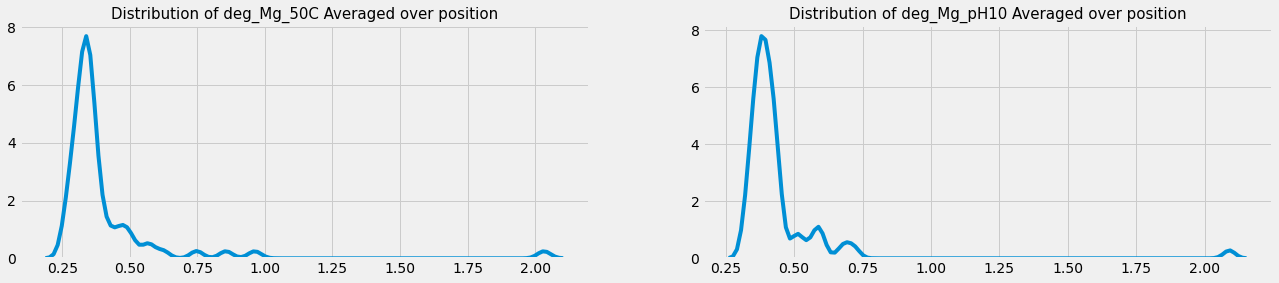

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

# Distribution of deg_50C Averaged over position
sns.kdeplot(avg_deg_Mg_50C,ax=ax[0])
ax[0].set_title('Distribution of deg_Mg_50C Averaged over position',size=15)


# Distribution of deg_pH10 Averaged over position
sns.kdeplot(avg_deg_Mg_pH10,ax=ax[1])
ax[1].set_title('Distribution of deg_Mg_pH10 Averaged over position',size=15)

plt.show()

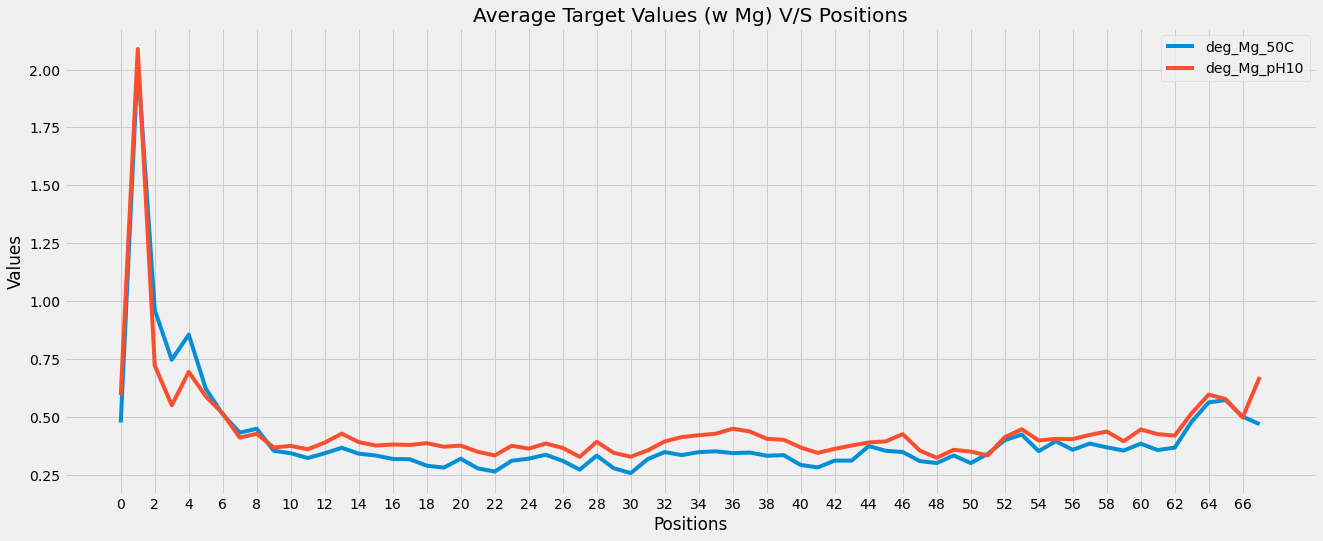

In [19]:
plt.figure(figsize=(20,8))

sns.lineplot(x=range(68),y=avg_deg_Mg_50C,label='deg_Mg_50C')
sns.lineplot(x=range(68),y=avg_deg_Mg_pH10,label='deg_Mg_pH10')

plt.xlabel('Positions')
plt.xticks(range(0,68,2))
plt.ylabel('Values')
plt.title('Average Target Values (w Mg) V/S Positions')

plt.show()

* Most of the time **deg_Mg_pH10** is more than **deg_Mg_50C**
* And we can see some **correlation** between them

In [20]:
print("Correlation Coeff between avg_deg_Mg_50C & avg_deg_Mg_pH10: ",np.corrcoef(avg_deg_Mg_50C,avg_deg_Mg_pH10)[0][1])

Correlation Coeff between avg_deg_Mg_50C & avg_deg_Mg_pH10:  0.9651712822435524


* **deg_Mg_50C & deg_Mg_pH10** are highly correlated

### Distribution of Target at a Random Position

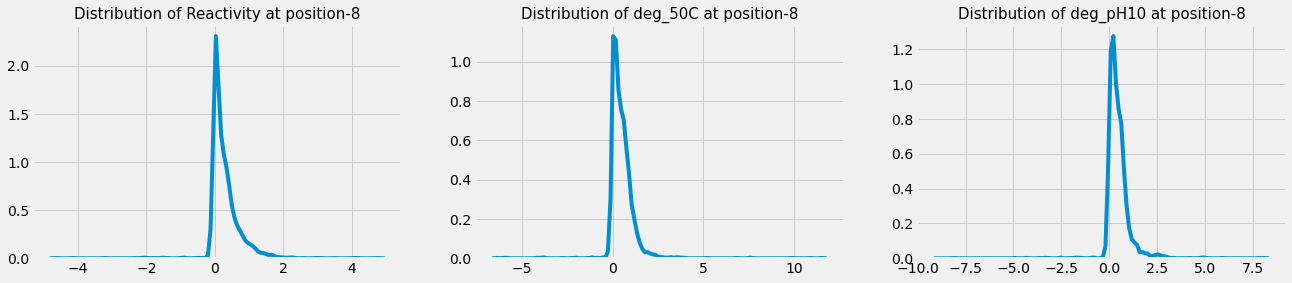

In [21]:
pos = np.random.choice(68)

fig, ax = plt.subplots(1,3,figsize=(20,4))

# Distribution of Reactivity at Random position
sns.kdeplot(np.array(list(map(np.array,train.reactivity)))[:,pos],ax=ax[0])
ax[0].set_title(f'Distribution of Reactivity at position-{pos}',size=15)

# Distribution of deg_50C at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_50C)))[:,pos],ax=ax[1])
ax[1].set_title(f'Distribution of deg_50C at position-{pos}',size=15)

# Distribution of deg_pH10 at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_pH10)))[:,pos],ax=ax[2])
ax[2].set_title(f'Distribution of deg_pH10 at position-{pos}',size=15)

plt.show()

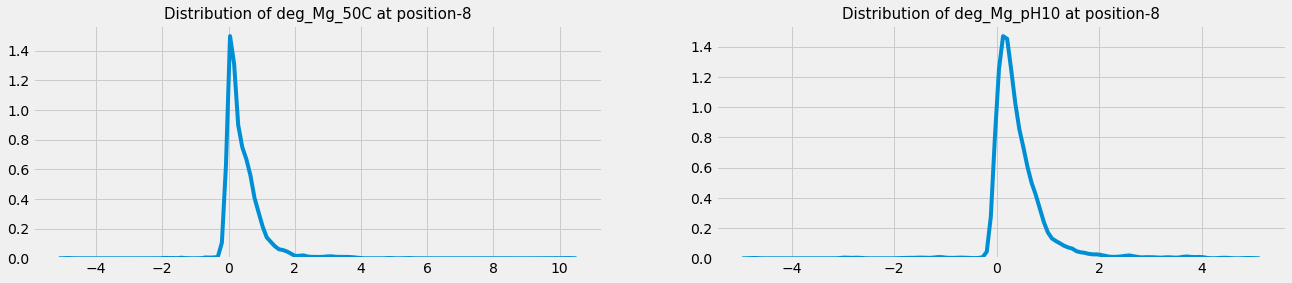

In [22]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

# Distribution of deg_50C at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_Mg_50C)))[:,pos],ax=ax[0])
ax[0].set_title(f'Distribution of deg_Mg_50C at position-{pos}',size=15)


# Distribution of deg_pH10 at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_Mg_pH10)))[:,pos],ax=ax[1])
ax[1].set_title(f'Distribution of deg_Mg_pH10 at position-{pos}',size=15)

plt.show()

### Errors in Calculation (Averaged over positions)

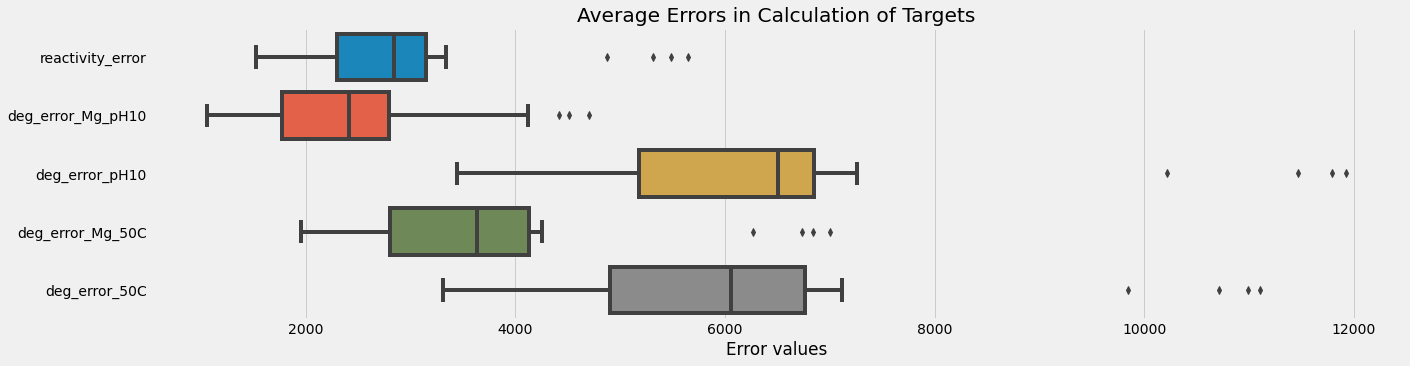

In [23]:
y = ['reactivity_error','deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C','deg_error_50C']
x = [np.array(list(map(np.array,train[col]))).mean(axis=0) for col in y]

plt.figure(figsize=(20,5))

sns.boxplot(y=y,x=x)

plt.xlabel('Error values')
plt.title('Average Errors in Calculation of Targets')

plt.show()

* Very high values of Errors in **deg_error_pH10 & deg_error_50C** but maybe we should not worry about these targets because evaluation is not based on these targets
* Maybe this could be a reason why our models will not be scored on these two targets

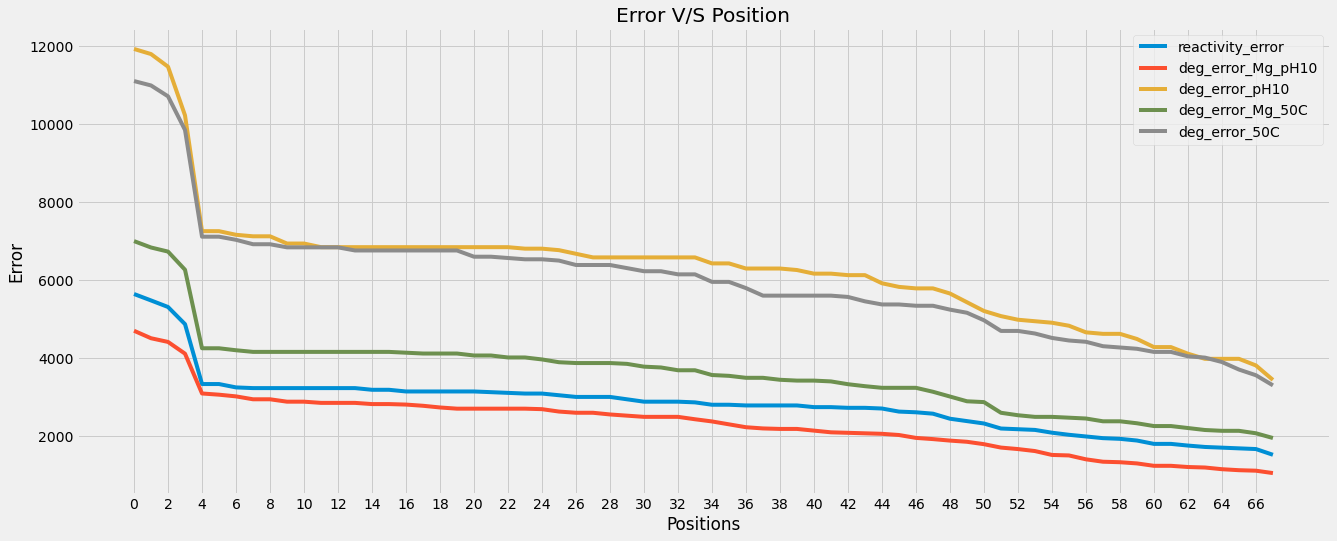

In [24]:
plt.figure(figsize=(20,8))

for i in range(len(y)):
    sns.lineplot(x=range(68),y=x[i],label=y[i])
    
plt.xlabel('Positions')
plt.xticks(range(0,68,2))
plt.ylabel('Error')
plt.title('Error V/S Position')

plt.show()

* We can see an **interesting pattern** here. We have high values of **errors** between postions **0 and 4**, but then it starts **decreasing constantly** as we go ahead
* Now let's analyse if all samples are contributing to these high values or there are only few smaples which are driving these values

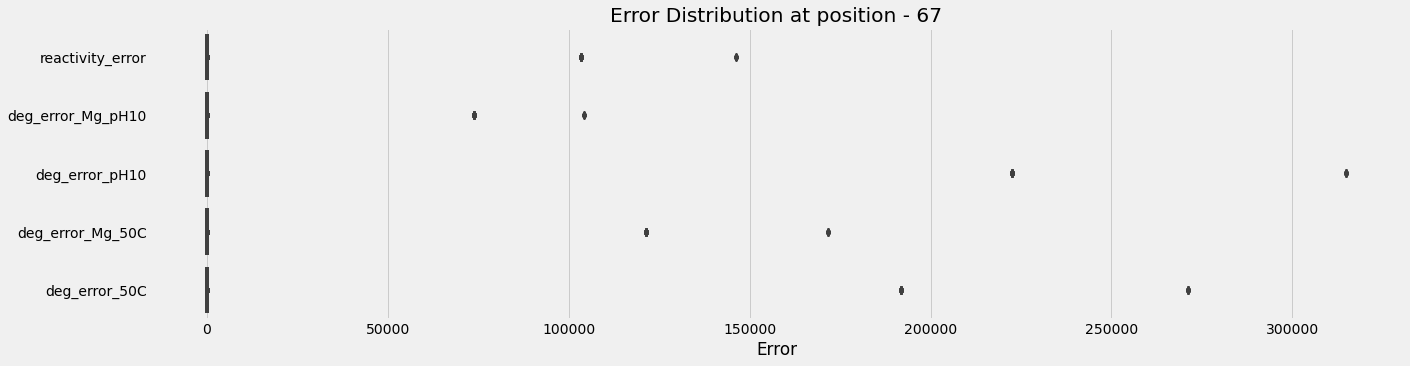

In [25]:
pos = np.random.choice(68)

y = ['reactivity_error','deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C','deg_error_50C']
x = [np.array(list(map(np.array,train[col])))[:,pos] for col in y]

plt.figure(figsize=(20,5))
plt.title(f'Error Distribution at position - {pos}')
plt.xlabel('Error')

sns.boxplot(y=y,x=x)

plt.show()

* We can see there are few samples which are having high values of errors
* Now let's try to filter these samples
* We can try using **SN_filter** for this

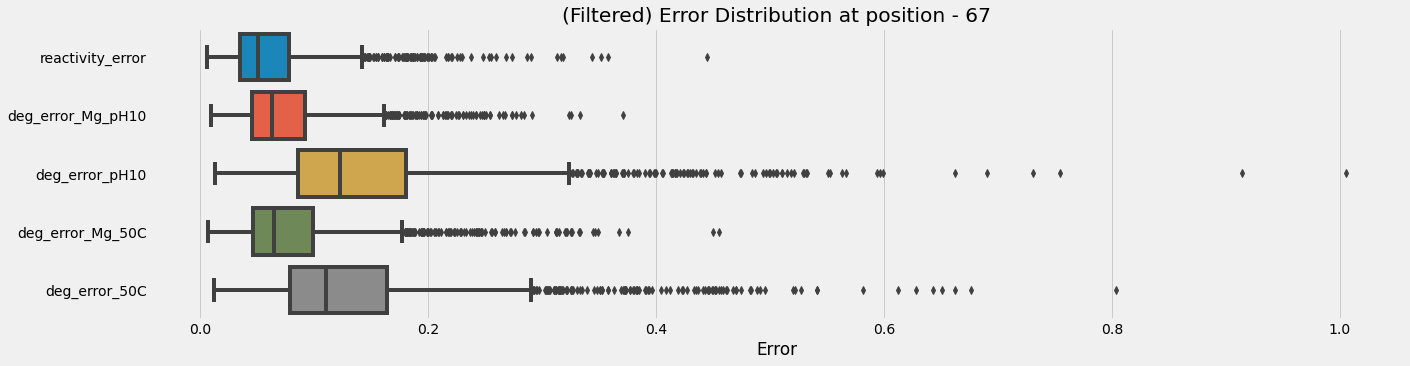

In [26]:
y = ['reactivity_error','deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C','deg_error_50C']
x = [np.array(list(map(np.array,train[train.SN_filter==1][col])))[:,pos] for col in y]

plt.figure(figsize=(20,5))
plt.title(f'(Filtered) Error Distribution at position - {pos}')
plt.xlabel('Error')

sns.boxplot(y=y,x=x)

plt.show()

* Samples with **SN_filter = 1** are having low values of errors
* We can use this **filter** to train our model only on these samples but as the **private test** data is **not filtered**, it might only give good results on **Public LB** but not on **Private LB**

### RNA Structure

In [27]:
!pip3 install -q forgi[all]
!conda install -y -c bioconda viennarna

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - viennarna


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py37hc8dfbb8_1         3.0 MB  conda

In [28]:
import forgi.graph.bulge_graph as fgb
import forgi.visual.mplotlib as fvm

In [29]:
def plot_sample(sample):
    
    """Source: https://www.kaggle.com/erelin6613/openvaccine-rna-visualization"""
    
    struct = sample['structure']
    seq = sample['sequence']
    bg = fgb.BulgeGraph.from_fasta_text(f'>rna1\n{struct}\n{seq}')[0]
    
    plt.figure(figsize=(20,8))
    fvm.plot_rna(bg)
    plt.title(f"RNA Structure (id: {sample.id})")
    plt.show()

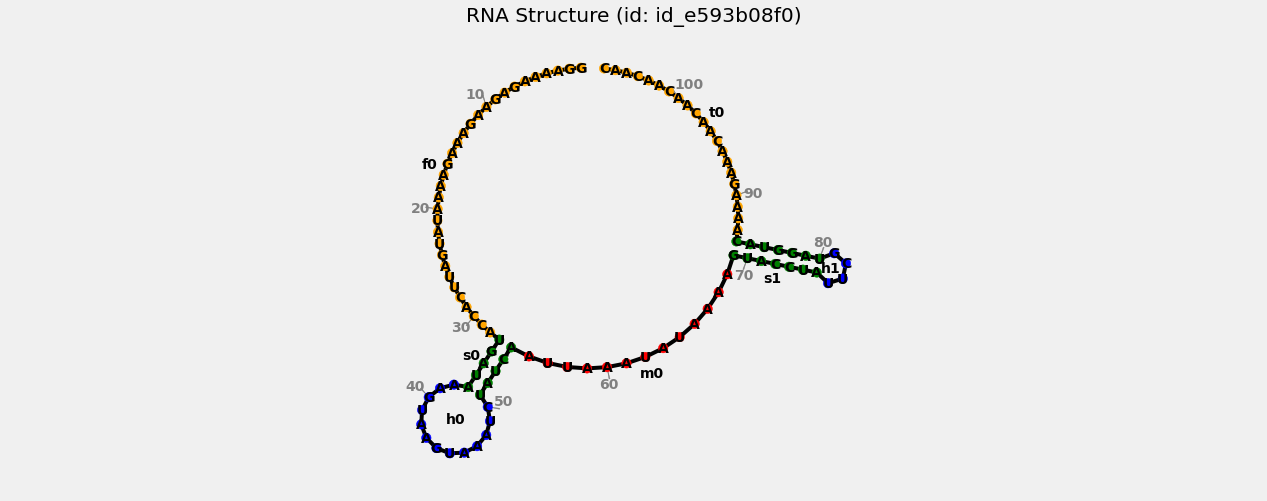

In [30]:
sample = train.iloc[np.random.choice(train.shape[0])]
plot_sample(sample)

In [31]:
print("Predicted Loop type: ",sample['predicted_loop_type'])

Predicted Loop type:  EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEESSSSSHHHHHHHHHHHHHSSSSSXXXXXXXXXXXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE


* Here, we can see in image there is a **loop-m1** but for the this same loop, we have different **predicted loop type** in our data -> **loop type - X**
* Why it is like this? 

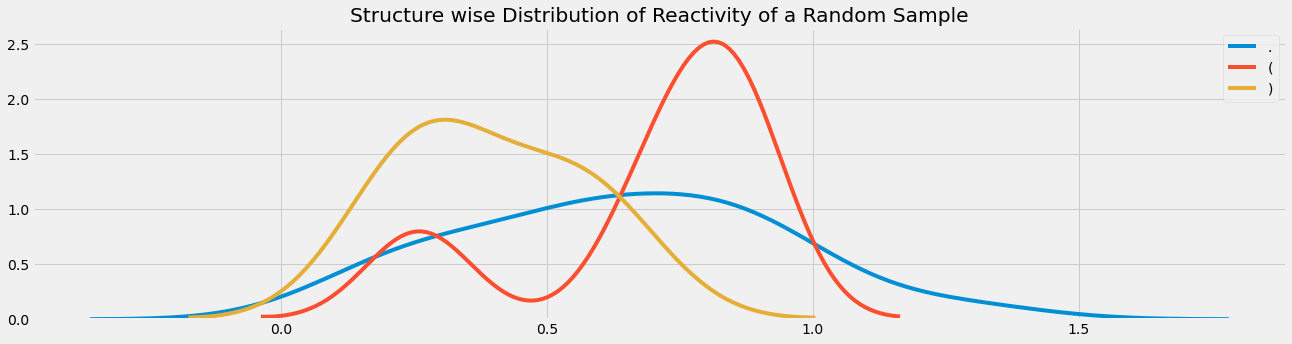

In [32]:
from collections import defaultdict

reactivity = defaultdict(lambda: [])
deg_Mg_50C = defaultdict(lambda: [])
deg_Mg_pH10 = defaultdict(lambda: [])

for i in range(len(sample['reactivity'])):
    reactivity[sample['structure'][i]].append(float(sample['reactivity'][i]))
    deg_Mg_50C[sample['structure'][i]].append(float(sample['deg_Mg_50C'][i]))
    deg_Mg_pH10[sample['structure'][i]].append(float(sample['deg_Mg_pH10'][i]))

plt.figure(figsize=(20,5))
for key in reactivity.keys():
    sns.kdeplot(data=reactivity[key],label=key)

plt.title('Structure wise Distribution of Reactivity of a Random Sample')
plt.show()

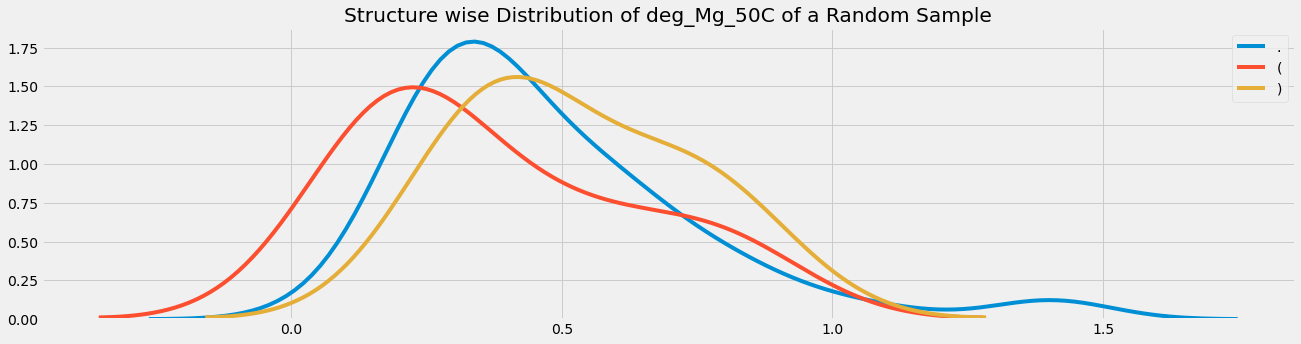

In [33]:
plt.figure(figsize=(20,5))
for key in reactivity.keys():
    sns.kdeplot(data=deg_Mg_50C[key],label=key)

plt.title('Structure wise Distribution of deg_Mg_50C of a Random Sample')
plt.show()

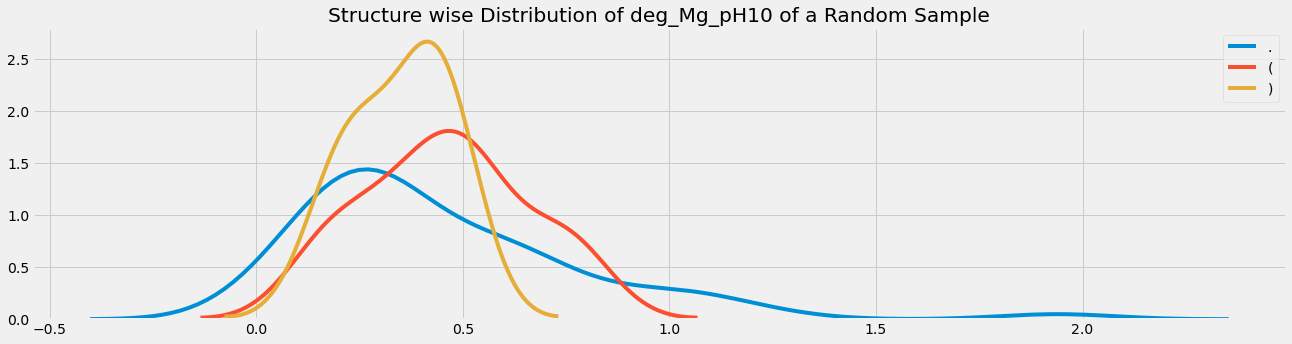

In [34]:
plt.figure(figsize=(20,5))
for key in reactivity.keys():
    sns.kdeplot(data=deg_Mg_pH10[key],label=key)

plt.title('Structure wise Distribution of deg_Mg_pH10 of a Random Sample')
plt.show()

### Pair wise Exploration of Degradation

In [35]:
reactivityDict = defaultdict(lambda: [])

for index in range(train.shape[0]):
    
    sample = train.iloc[index]

    structure = sample['structure']
    sequence = sample['sequence']
    reactivity = sample['reactivity']

    q = []

    for i,s in enumerate(structure[:len(reactivity)]):
        if s=='.':
            reactivityDict[sequence[i]].append(reactivity[i])
        elif s=='(':
            q.append(i)
        elif s==')':
            j = q.pop(0)
            key = "-".join(sorted([sequence[i],sequence[j]]))
            reactivityDict[key].append(reactivity[i])
            reactivityDict[key].append(reactivity[j])

#### Base-Pair wise Distribution of Reactivity

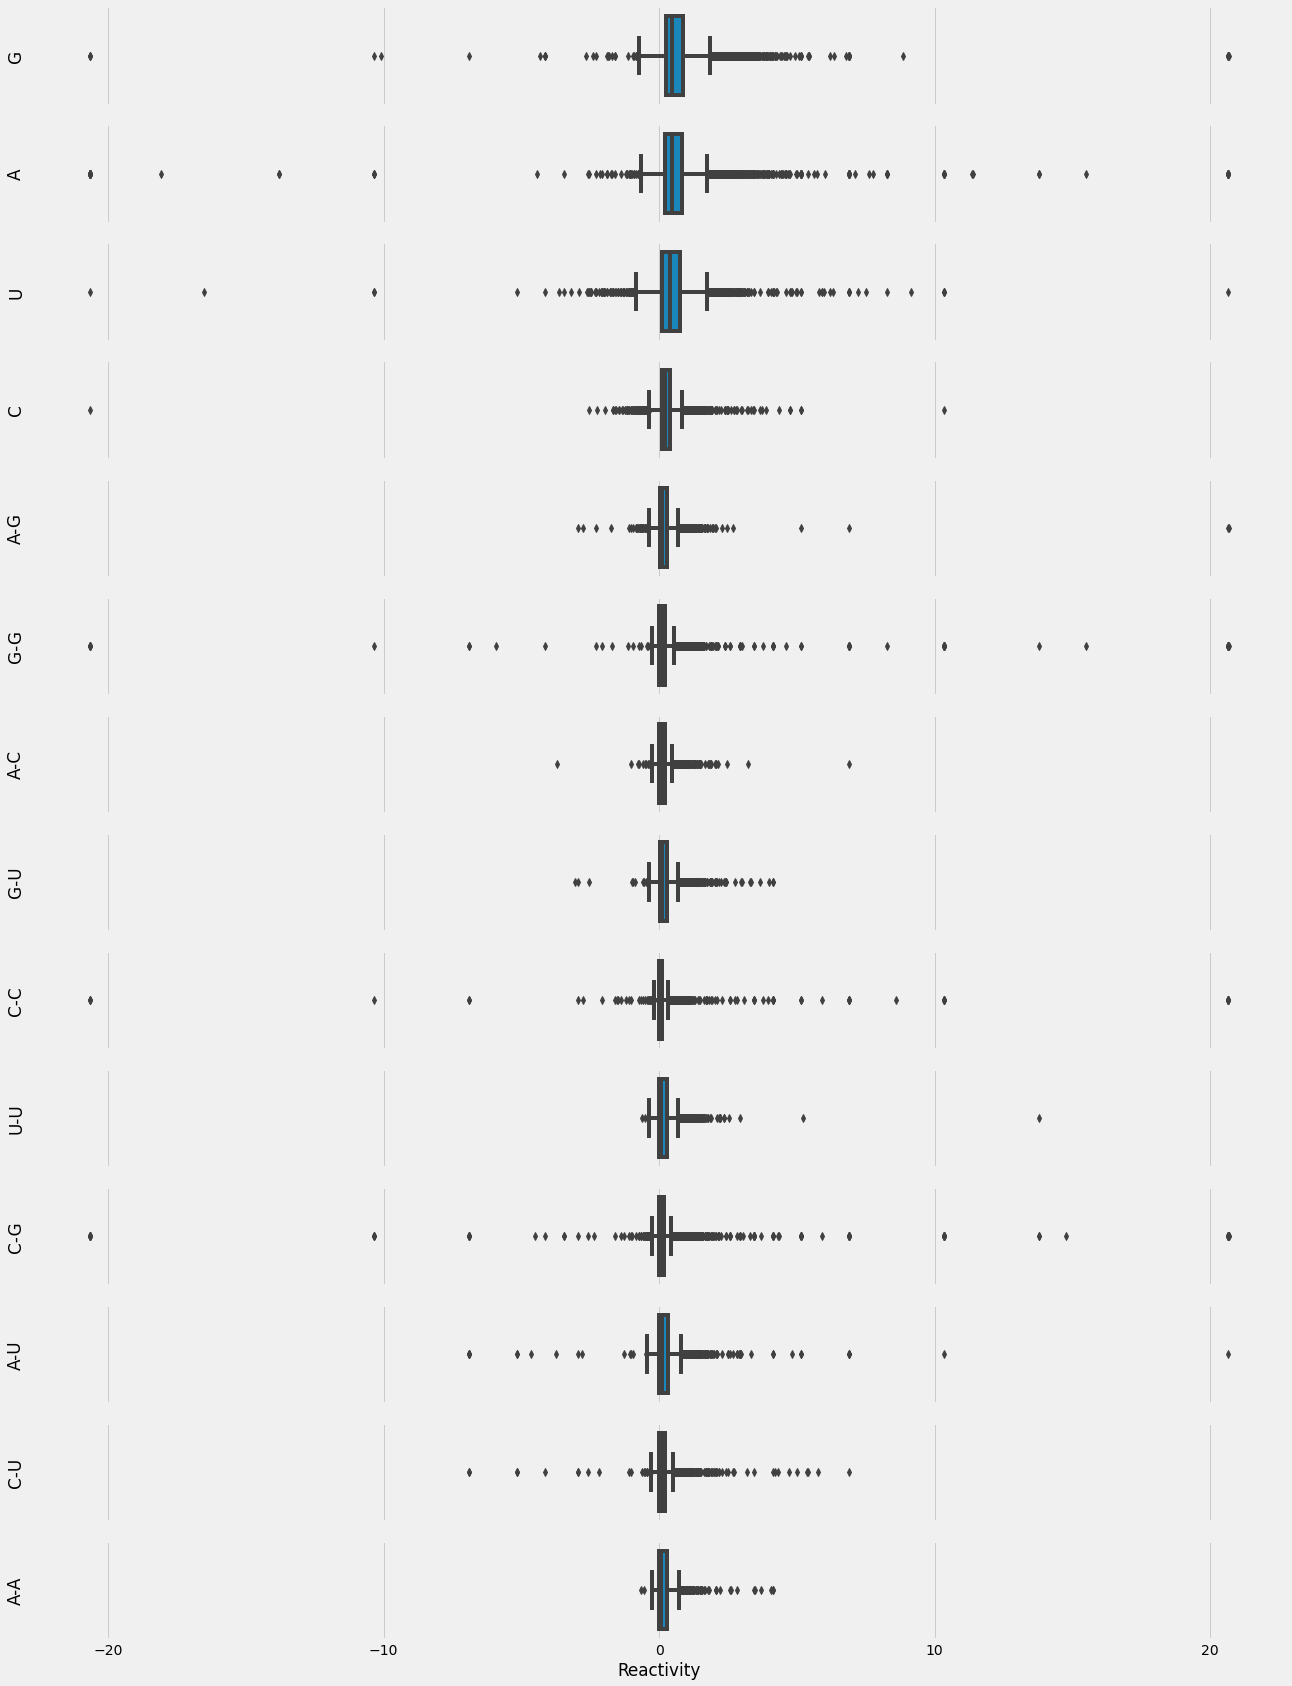

In [36]:
fig, ax = plt.subplots(len(reactivityDict.keys()),1,figsize=(20,2*len(reactivityDict.keys())),sharex=True)

for i, key in enumerate(reactivityDict.keys()):
    sns.boxplot(x=reactivityDict[key],ax=ax[i])
    ax[i].set_ylabel(key)

plt.xlabel('Reactivity')
plt.show()

* Single bases are having bigger range of **Reactivity** than **Paired Bases**.
* Most of the pairs have distribution around **0**